# Imports

In [1]:
%matplotlib inline
import copy
import matplotlib.pyplot as plt
import networkx as nx
import random
import seaborn as sns
import numpy as np
import pandas as pd

# Auxiliary functions

In [2]:
def random_DSM(n):
    A = []
    for i in range(n):
        row = []
        for j in range(n):
            if j == i:
                row.append(0)
            else:
                row.append(random.randint(0, 1))
        A.append(row)
    return A

In [65]:
def ppm(A):
    """Pretty Print matrix"""
    print('\n'.join(['\t'.join([str("{:.3f}".format(cell)) for cell in row]) for row in A]))

In [4]:
def random_prob_matrix(A):
    P = copy.deepcopy(A)
    for i, row in enumerate(P):
        for j, element in enumerate(row):
            if element != 0:
                P[i][j] = random.random()
    return P


In [5]:
def plot_graph(A):
    Anp = np.matrix(A)
    g = nx.from_numpy_matrix(Anp, create_using=nx.DiGraph)

    # layout
    #pos = nx.spring_layout(G, iterations=50)
    pos = nx.spring_layout(g)
    labels = {}
    for i in range(Anp[0].size):
        labels[i] = str(i)
    # rendering
    plt.figure(figsize=(10,10))
    nx.draw_networkx_nodes(g, pos)
    nx.draw_networkx_edges(g, pos, node_size=1000, arrows=True)
    nx.draw_networkx_labels(g, pos, labels)
    plt.axis('off')

In [6]:
def plot_heatmap(A):
    color_palette = sns.color_palette("Blues", as_cmap=True)
    ax = sns.heatmap(A, linewidth=0.5, cmap=color_palette)
    plt.yticks(rotation=0)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.tick_params(length=0)
    # set aspect of all axis
    ax.set_aspect('equal','box')
    plt.show()

# Data input

## Random

DSM:
0.000	1.000	0.000
1.000	0.000	0.000
0.000	0.000	0.000
Direct likelihood matrix l:
0.000	0.140	0.000
0.596	0.000	0.000
0.000	0.000	0.000
Direct impact matrix i:
0.000	0.798	0.000
0.517	0.000	0.000
0.000	0.000	0.000
Direct risk matrix r:
0.000	0.112	0.000
0.308	0.000	0.000
0.000	0.000	0.000


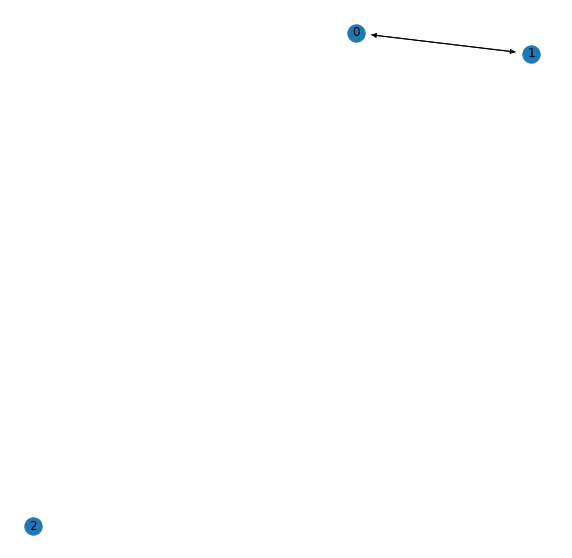

In [68]:
n = 3

# DSM
A = random_DSM(n)
print("DSM:")
ppm(A)
plot_graph(A)

# Direct likelihood matrix
l = random_prob_matrix(A)
print("Direct likelihood matrix l:")
ppm(l)
# Direct impact matrix
i = random_prob_matrix(A)
print("Direct impact matrix i:")
ppm(i)
# Direct risk matrix
r = (np.array(l)*np.array(i)).tolist()
print("Direct risk matrix r:")
ppm(r)

#plot_heatmap(A)
#plot_heatmap(l)
#plot_heatmap(i)
#plot_heatmap(r)

## From (Clarkson et al., 2004)

In [37]:
A = [[0,1,1,0,0,0],[1,0,0,1,1,1],[1,0,0,1,1,1],[1,1,1,0,0,1],[0,0,1,1,0,1],[1,1,1,1,1,0]]
l = [[0,0.3,0.3,0,0,0],[0.9,0,0,0.6,0.3,0.6],[0.9,0,0,0.6,0.3,0.6],[0.3,0.6,0.9,0,0,0.9],[0,0,0.3,0.6,0,0.3],[0.3,0.9,0.6,0.9,0.6,0]]
i = [[0,0.9,0.9,0,0,0],[0.9,0,0,0.6,0.3,0.3],[0.6,0,0,0.3,0.3,0.3],[0.3,0.3,0.6,0,0,0.3],[0,0,0.3,0.3,0,0.3],[0.3,0.6,0.6,0.9,0.6,0]]
r = (np.array(l)*np.array(i)).tolist()
ppm(r)

0.0	0.3	0.3	0.0	0.0	0.0
0.8	0.0	0.0	0.4	0.1	0.2
0.5	0.0	0.0	0.2	0.1	0.2
0.1	0.2	0.5	0.0	0.0	0.3
0.0	0.0	0.1	0.2	0.0	0.1
0.1	0.5	0.4	0.8	0.4	0.0


In [11]:
for i, row in enumerate(A):
    print(row)
    for j, element in enumerate(row):
        if element == 1:
            print(f"There is a link between {i} and {j}")


[0, 0, 1, 0]
There is a link between 0 and 2
[0, 0, 0, 1]
There is a link between 1 and 3
[1, 0, 0, 0]
There is a link between 2 and 0
[1, 1, 1, 0]
There is a link between 3 and 0
There is a link between 3 and 1
There is a link between 3 and 2


In [35]:
def combined_risk(A,L,I,b,a):
    second = 1
    Anp = np.matrix(A)
    g = nx.from_numpy_matrix(Anp, create_using=nx.DiGraph)
    for path in nx.all_simple_paths(g, b, a):
        print(path)
        path_likelihood = 1
        path_risk = 1
        for i, source in enumerate(path):
            if source != a:
                destination = path[i+1]
                #print(f"From source {source} to destination {destination}:")
                likelihood = L[source][destination]
                impact = I[source][destination]
                risk = likelihood * impact
                path_likelihood = path_likelihood * likelihood
                path_risk = path_risk * (risk)
                #print(f"  Likelihood: {likelihood}")
                #print(f"  Impact    : {impact}")
                #print(f"  Risk      : {risk}")
        print(f"Path likelihood: {path_likelihood}")
        print(f"Path risk: {path_risk}")
        second = second * path_likelihood

    R = 1 - second
    return R

In [38]:
combined_risk(A,L,I,0,2)

[0, 1, 3, 2]
Path likelihood: 0.162
Path risk: 0.05248800000000001
[0, 1, 3, 5, 2]
Path likelihood: 0.0972
Path risk: 0.00944784
[0, 1, 3, 5, 4, 2]
Path likelihood: 0.02916
Path risk: 0.0008503056000000001
[0, 1, 4, 2]
Path likelihood: 0.027
Path risk: 0.002187
[0, 1, 4, 3, 2]
Path likelihood: 0.0486
Path risk: 0.00236196
[0, 1, 4, 3, 5, 2]
Path likelihood: 0.02916
Path risk: 0.00042515280000000004
[0, 1, 4, 5, 2]
Path likelihood: 0.0162
Path risk: 0.00078732
[0, 1, 4, 5, 3, 2]
Path likelihood: 0.02187
Path risk: 0.0009565938000000002
[0, 1, 5, 2]
Path likelihood: 0.108
Path risk: 0.017496
[0, 1, 5, 3, 2]
Path likelihood: 0.1458
Path risk: 0.021257640000000005
[0, 1, 5, 4, 2]
Path likelihood: 0.0324
Path risk: 0.00157464
[0, 1, 5, 4, 3, 2]
Path likelihood: 0.05832
Path risk: 0.0017006112000000002
[0, 2]
Path likelihood: 0.3
Path risk: 0.27


0.9999999999999999

0.0 0.0 0.0 0 0
1.0 0.0 0.11187635302396749 0.14014008987948356 0.7983179768200372
2.0 0.0 0.0 0 0
0.0 1.0 0.3077684263692795 0.595576554021222 0.5167571226423948
1.0 1.0 0.0 0 0
2.0 1.0 0.0 0 0
0.0 2.0 0.0 0 0
1.0 2.0 0.0 0 0
2.0 2.0 0.0 0 0


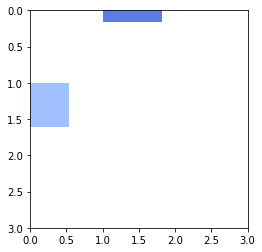

In [70]:
from matplotlib.patches import Rectangle

#flat_list = [item for sublist in t for item in sublist]

#x  = [0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0]
#y  = [0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0]
#z  = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#dx = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#dy = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

x  = [0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0]
y  = [0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0]
dx = [item for sublist in l for item in sublist]
dy = [item for sublist in i for item in sublist]
z = [item for sublist in r for item in sublist]

cmap = plt.cm.coolwarm
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

for x, y, c, h, w in zip(x, y, z, dx, dy):
    print(x, y, c, h, w)
    ax.add_artist(Rectangle(xy=(x, y),
                  color=cmap(c),
                  width=w, height=h))

plt.xlim([0, 3])
plt.ylim([0, 3])
plt.gca().invert_yaxis()
plt.show()

# Definitions

$a$: destination of change

$b$: source of change

$u$: pen-ultimate sub-system i the chain from **a** to **b**

$\sigma_{u,a}$: Likelihood of change reaching sub-system **u** from **a**

$l_{b,u}$: Direct likelihood of change  **u** from **a**

Risk of change propagating from **u** to **b**:

$\rho_{b,u} = \sigma_{u,a} l_{b,u} i_{b,u}$

Combined risk of change propagating from **b** to **a**:

$R_{b,a} = 1- \prod{(1 - \rho_{b,u})}$